<h1>Iris Data Clustering</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
x = df.iloc[:,1:5].values

In [4]:
from sklearn.cluster import KMeans

In [5]:
wcss=[]
for i in range(1,10):
    kmeans = KMeans(n_clusters = i , init = "k-means++", max_iter = 400 , n_init = 10 , random_state = 7)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

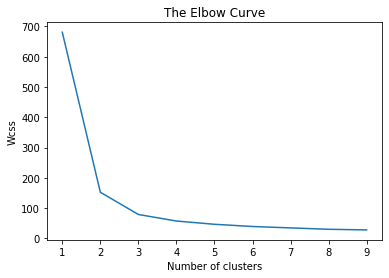

In [6]:
plt.plot(range(1,10),wcss)
plt.title("The Elbow Curve")
plt.xlabel("Number of clusters")
plt.ylabel("Wcss")
plt.show()

<h6>You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as ** '3**'.</h6>

In [7]:
kmeans = KMeans(n_clusters=3, init = "k-means++", max_iter = 400 , n_init =10 , random_state = 0)
y_kmeans = kmeans.fit_predict(x)

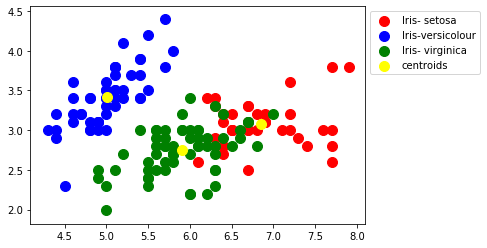

In [8]:
plt.scatter(x[y_kmeans ==0, 0], x[y_kmeans==0 ,1],s=100,c="red",label = "Iris- setosa")
plt.scatter(x[y_kmeans ==1, 0], x[y_kmeans==1, 1],s=100,c="blue",label = "Iris-versicolour")
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans== 2,1],s=100,c="green",label = "Iris- virginica")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c="yellow", label = "centroids")
plt.legend(bbox_to_anchor=(1,1))
plt.show()